In [2]:
!pip install requests beautifulsoup4 pandas

General Election to Parliamentary Constituencies: Trends & Results June-2024


Web Scraping for Election Data Analysis
Web scraping involves extracting data from websites directly, enabling analysis and visualization. In this context, we scrape election results data to analyze party-wise seat distributions, trends, and insights.


In [3]:
'''BeautifulSoup simplifies HTML parsing and data extraction from web pages,
crucial for navigating and isolating specific elements like election results tables efficiently.
Its robust tag handling and integration with Requests ensure reliable extraction of structured data,
essential for analyzing and visualizing election trends accurately'''

import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'

# Send a GET request to the website
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table in the HTML
table = soup.find('table')

if table:
    # Extract table headers
    headers = []
    for th in table.find_all('th'):
        text = th.text.strip()
        if text and not text.isdigit():
            headers.append(text)
    print("Original Headers:", headers)

    # Manually set the correct headers if necessary
    headers = ['Party', 'Won', 'Leading', 'Total']  # Adjust as needed
    print("Corrected Headers:", headers)

    # Extract table rows
    data = []
    rows = table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        if len(cols) == len(headers):
            data.append(cols)
        elif len(cols) > 0:
            print(f"Skipping row with {len(cols)} columns: {cols}")

    print("Data:", data)

    # Create a DataFrame and save it to a CSV file
    if data:
        df = pd.DataFrame(data, columns=headers)
        df.to_csv('table_data.csv', index=False)
        print('Data scraped and saved to table_data.csv')
    else:
        print('No data found to save.')
else:
    print('No table found on the page.')


Original Headers: ['Party', 'Won', 'Leading', 'Total', 'Total']
Corrected Headers: ['Party', 'Won', 'Leading', 'Total']
Data: [['Bharatiya Janata Party - BJP', '240', '0', '240'], ['Indian National Congress - INC', '99', '0', '99'], ['Samajwadi Party - SP', '37', '0', '37'], ['All India Trinamool Congress - AITC', '29', '0', '29'], ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22'], ['Telugu Desam - TDP', '16', '0', '16'], ['Janata Dal  (United) - JD(U)', '12', '0', '12'], ['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9'], ['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8'], ['Shiv Sena - SHS', '7', '0', '7'], ['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5'], ['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4'], ['Rashtriya Janata Dal - RJD', '4', '0', '4'], ['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4'], ['Indian Union Muslim League - IUML', '3', '0', '3'], ['Aam Aadmi Party - AAAP', '3', '0', '3'], ['Jhar

Data Extraction

In [4]:
# Import necessary libraries
import pandas as pd
import io

# Upload the CSV file from local system to Google Colab
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file has a different key, check the keys first
uploaded_keys = uploaded.keys()
print("Uploaded keys:", uploaded_keys)

# Load the CSV data into a DataFrame
file_name = next(iter(uploaded_keys))  # Get the first key in the dictionary
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving table_data.csv to table_data (1).csv
Uploaded keys: dict_keys(['table_data (1).csv'])


Data Preprocessing and Analysis

In [5]:
# Display the first few rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                                 Party  Won  Leading  Total
0         Bharatiya Janata Party - BJP  240        0    240
1       Indian National Congress - INC   99        0     99
2                 Samajwadi Party - SP   37        0     37
3  All India Trinamool Congress - AITC   29        0     29
4      Dravida Munnetra Kazhagam - DMK   22        0     22


In [6]:
# Display basic statistics of the dataset
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
              Won  Leading       Total
count   42.000000     42.0   42.000000
mean    12.928571      0.0   12.928571
std     39.466808      0.0   39.466808
min      1.000000      0.0    1.000000
25%      1.000000      0.0    1.000000
50%      2.000000      0.0    2.000000
75%      6.500000      0.0    6.500000
max    240.000000      0.0  240.000000


In [7]:
# Display information about the DataFrame
print("\nDataFrame information:")
print(df.info())


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Party    42 non-null     object
 1   Won      42 non-null     int64 
 2   Leading  42 non-null     int64 
 3   Total    42 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB
None


In [8]:
# Display the shape of the DataFrame
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(42, 4)


In [9]:
# Display the column names of the DataFrame
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Party', 'Won', 'Leading', 'Total'], dtype='object')


In [10]:
# Display the data types of each column
print("\nData types:")
print(df.dtypes)


Data types:
Party      object
Won         int64
Leading     int64
Total       int64
dtype: object


In [11]:
# Check for missing values in each column
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Party      0
Won        0
Leading    0
Total      0
dtype: int64


In [12]:
# Display unique values in a specific column
print("\nUnique values in 'Party' column:")
print(df['Party'].unique())


Unique values in 'Party' column:
['Bharatiya Janata Party - BJP' 'Indian National Congress - INC'
 'Samajwadi Party - SP' 'All India Trinamool Congress - AITC'
 'Dravida Munnetra Kazhagam - DMK' 'Telugu Desam - TDP'
 'Janata Dal  (United) - JD(U)'
 'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT'
 'Nationalist Congress Party – Sharadchandra Pawar - NCPSP'
 'Shiv Sena - SHS' 'Lok Janshakti Party(Ram Vilas) - LJPRV'
 'Yuvajana Sramika Rythu Congress Party - YSRCP'
 'Rashtriya Janata Dal - RJD'
 'Communist Party of India  (Marxist) - CPI(M)'
 'Indian Union Muslim League - IUML' 'Aam Aadmi Party - AAAP'
 'Jharkhand Mukti Morcha - JMM' 'Janasena Party - JnP'
 'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)'
 'Janata Dal  (Secular) - JD(S)' 'Viduthalai Chiruthaigal Katchi - VCK'
 'Communist Party of India - CPI' 'Rashtriya Lok Dal - RLD'
 'Jammu & Kashmir National Conference - JKN'
 'United People’s Party, Liberal - UPPL' 'Asom Gana Parishad - AGP'
 'Hindustani Awam

In [13]:
# Group by a categorical column and calculate mean of numerical columns
grouped_stats = df.groupby('Party').mean()
print("\nGrouped statistics by 'Party':")
print(grouped_stats)


Grouped statistics by 'Party':
                                                      Won  Leading  Total
Party                                                                    
AJSU Party - AJSUP                                    1.0      0.0    1.0
Aam Aadmi Party - AAAP                                3.0      0.0    3.0
Aazad Samaj Party (Kanshi Ram) - ASPKR                1.0      0.0    1.0
All India Majlis-E-Ittehadul Muslimeen - AIMIM        1.0      0.0    1.0
All India Trinamool Congress - AITC                  29.0      0.0   29.0
Apna Dal (Soneylal) - ADAL                            1.0      0.0    1.0
Asom Gana Parishad - AGP                              1.0      0.0    1.0
Bharat Adivasi Party - BHRTADVSIP                     1.0      0.0    1.0
Bharatiya Janata Party - BJP                        240.0      0.0  240.0
Communist Party of India  (Marxist) - CPI(M)          4.0      0.0    4.0
Communist Party of India  (Marxist-Leninist)  (...    2.0      0.0    2.0
Commun

Drawing out key insights

In [14]:
# Insight 1: Total seats won by each party
df['Total'] = df['Won'] + df['Leading']
print("Total seats won by each party:")
print(df[['Party', 'Total']])


Total seats won by each party:
                                                Party  Total
0                        Bharatiya Janata Party - BJP    240
1                      Indian National Congress - INC     99
2                                Samajwadi Party - SP     37
3                 All India Trinamool Congress - AITC     29
4                     Dravida Munnetra Kazhagam - DMK     22
5                                  Telugu Desam - TDP     16
6                        Janata Dal  (United) - JD(U)     12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT      9
8   Nationalist Congress Party – Sharadchandra Paw...      8
9                                     Shiv Sena - SHS      7
10             Lok Janshakti Party(Ram Vilas) - LJPRV      5
11      Yuvajana Sramika Rythu Congress Party - YSRCP      4
12                         Rashtriya Janata Dal - RJD      4
13       Communist Party of India  (Marxist) - CPI(M)      4
14                  Indian Union Muslim League - IUML 

In [15]:
# Insight 2: Top 5 parties by total seats won
top_5_parties = df.nlargest(5, 'Total')
print("\nTop 5 parties by total seats won:")
print(top_5_parties[['Party', 'Total']])


Top 5 parties by total seats won:
                                 Party  Total
0         Bharatiya Janata Party - BJP    240
1       Indian National Congress - INC     99
2                 Samajwadi Party - SP     37
3  All India Trinamool Congress - AITC     29
4      Dravida Munnetra Kazhagam - DMK     22


In [16]:
# Insight 3: Total number of parties that won seats
total_parties_won = df[df['Won'] > 0].shape[0]
print(f"\nTotal number of parties that won seats: {total_parties_won}")


Total number of parties that won seats: 42


In [17]:
# Insight 4: Average number of seats won per party
average_seats_won = df['Won'].mean()
print(f"\nAverage number of seats won per party: {average_seats_won:.2f}")


Average number of seats won per party: 12.93


In [18]:
# Insight 5: Distribution of total seats won
seat_distribution = df['Total'].value_counts().sort_index()
print("\nDistribution of total seats won:")
print(seat_distribution)


Distribution of total seats won:
Total
1      17
2       7
3       3
4       3
5       1
7       2
8       1
9       1
12      1
16      1
22      1
29      1
37      1
99      1
240     1
Name: count, dtype: int64


Data Visualization

<ipython-input-19-5e69eac7c63c>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

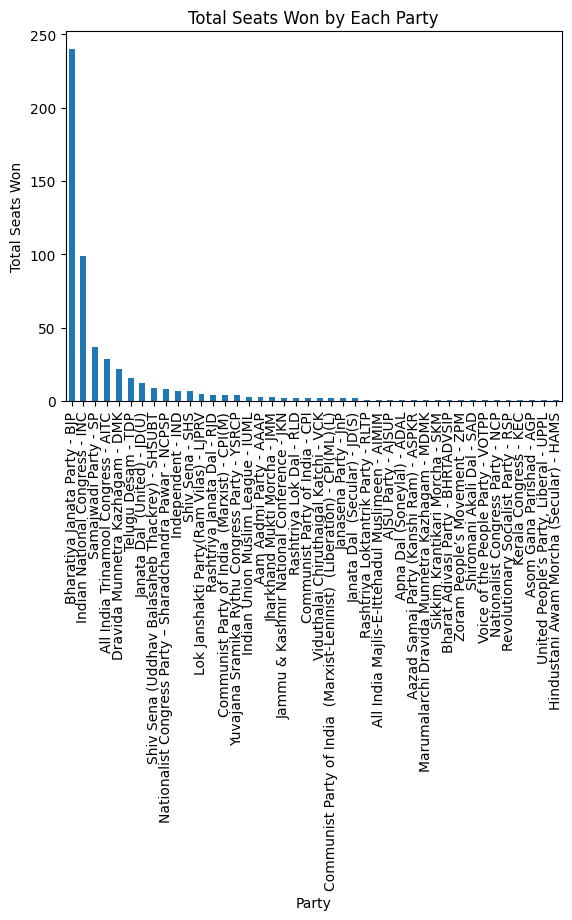

In [19]:
# Visualizations (optional)
import matplotlib.pyplot as plt

# Bar plot for total seats won by each party
plt.figure(figsize=(10, 6))
df.sort_values('Total', ascending=False).plot(kind='bar', x='Party', y='Total', legend=False)
plt.title('Total Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Total Seats Won')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

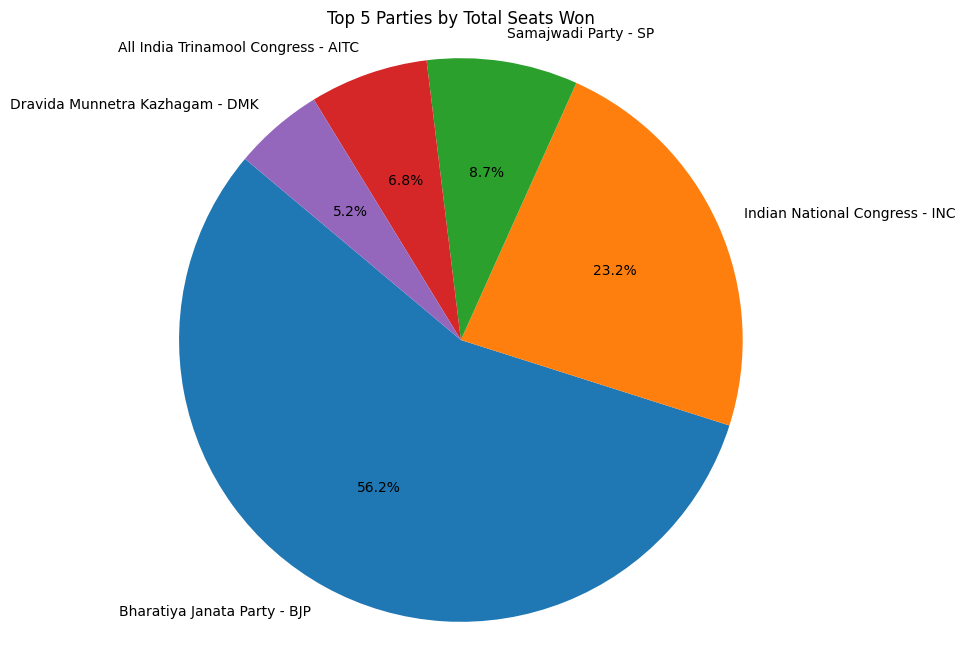

In [20]:
# Pie chart for the top 5 parties by total seats won
plt.figure(figsize=(8, 8))
plt.pie(top_5_parties['Total'], labels=top_5_parties['Party'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Parties by Total Seats Won')
plt.axis('equal')
plt.show()

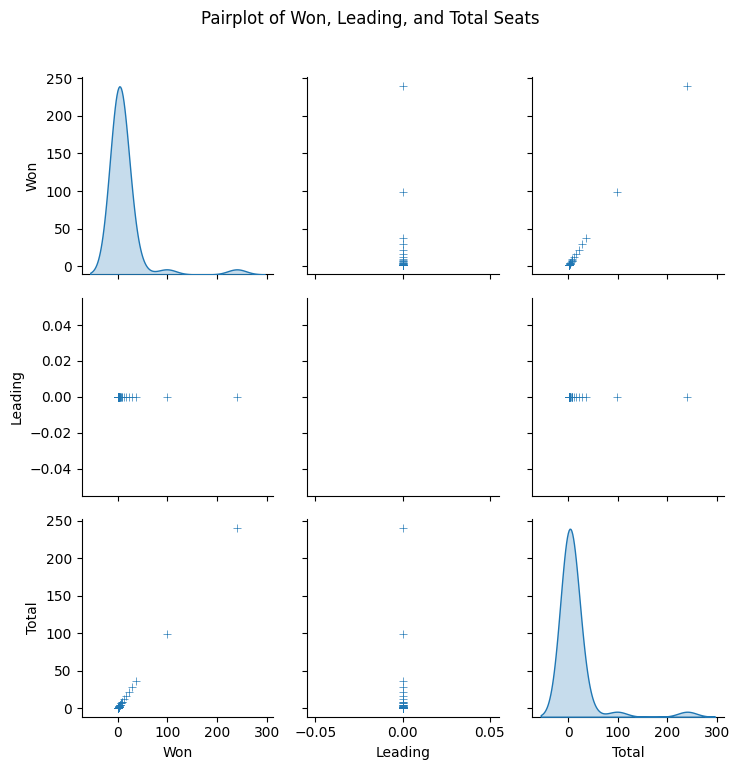

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between multiple numerical variables
sns.pairplot(df[['Won', 'Leading', 'Total']], diag_kind='kde', markers='+')
plt.suptitle('Pairplot of Won, Leading, and Total Seats', y=1.02)
plt.tight_layout()
plt.show()

In [22]:
!pip install dash
!pip install jupyter-dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:00


Showing the dashboard for each party

In [23]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Load your dataset (replace with your CSV file loading code)
# Example assuming 'df' is your DataFrame
df = pd.read_csv('table_data.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Election Analysis Dashboard"),

    # Dropdown to select party
    dcc.Dropdown(
        id='party-dropdown',
        options=[{'label': party, 'value': party} for party in df['Party'].unique()],
        value='Bharatiya Janata Party - BJP',  # Default value
        placeholder="Select a party",
        style={'width': '50%'}
    ),

    # Bar chart for seats won
    dcc.Graph(id='seats-won-bar'),

    # Scatter plot for leading vs. won seats
    dcc.Graph(id='leading-vs-won-scatter'),

    # Pie chart for percentage distribution of seats won
    dcc.Graph(id='percentage-pie-chart'),

    # Summary statistics
    html.Div(id='summary-stats')
])

# Define callback to update graphs and summary statistics based on dropdown value
@app.callback(
    [Output('seats-won-bar', 'figure'),
     Output('leading-vs-won-scatter', 'figure'),
     Output('percentage-pie-chart', 'figure'),
     Output('summary-stats', 'children')],
    [Input('party-dropdown', 'value')]
)
def update_graphs(selected_party):
    # Filter data based on selected party
    party_data = df[df['Party'] == selected_party]

    # Bar chart for seats won by selected party
    bar_fig = px.bar(party_data, x='Won', y='Party', orientation='h',
                     title=f"Seats Won by {selected_party}",
                     labels={'Won': 'Seats Won', 'Party': 'Party'})

    # Scatter plot for leading vs. won seats by selected party
    scatter_fig = px.scatter(party_data, x='Leading', y='Won',
                             title=f"Leading vs. Won Seats for {selected_party}",
                             labels={'Leading': 'Seats Leading', 'Won': 'Seats Won'})

    # Pie chart for percentage distribution of seats won by all parties
    pie_fig = px.pie(df, values='Won', names='Party',
                     title='Percentage Distribution of Seats Won by Party',
                     labels={'Won': 'Seats Won', 'Party': 'Party'},
                     hover_name='Party', hole=0.3)

    # Summary statistics
    summary_stats = html.Div([
        html.H3("Summary Statistics"),
        html.P(f"Total seats won: {party_data['Won'].sum()}"),
        html.P(f"Total seats leading: {party_data['Leading'].sum()}"),
        html.P(f"Total contested seats: {party_data['Total'].sum()}"),
    ])

    return bar_fig, scatter_fig, pie_fig, summary_stats

# Run the app
if __name__ == '__main__':
    app.run_server(mode='inline')  # Use 'inline' for Google Colab


<ipython-input-23-efd0a41e553a>:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-23-efd0a41e553a>:6: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>